In [30]:
from pathlib import Path
import numpy as np
import sys, os

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
data_dir = Path('../data/2sample_tests')
file_names = [
    #'DCORR_restricted_perm_results_dict_10000_min_rank-ZG3.pkl',
    #'DCORR_restricted-zeroed-centered_results_dict_10000_min_rank-ZG3.pkl',
    'MGC_restricted_perm_results_dict_10000_min_rank-ZG3.pkl',
    'MGC_restricted-zeroed-centered_results_dict_10000_min_rank-ZG3.pkl',
]

In [10]:
with open(data_dir / file_names[0], 'rb') as handle:
    data_dict = pickle.load(handle)

In [43]:
data_dict.keys()#['Experts Resting vs. Experts Compassion'][0]#.keys()

dict_keys(['Experts Resting vs. Experts Compassion', 'Experts Resting vs. Experts Open Monitoring', 'Experts Open Monitoring vs. Experts Compassion', 'Experts Resting vs. Experts Meditating', 'Novices Resting vs. Novices Compassion', 'Novices Resting vs. Novices Open Monitoring', 'Novices Open Monitoring vs. Novices Compassion', 'Novices Resting vs. Novices Meditating', 'Experts Resting vs. Novices Resting', 'Experts Compassion vs. Novices Compassion', 'Experts Open Monitoring vs. Novices Open Monitoring', 'Experts Meditating vs. Novices Meditating', 'Experts All vs. Novices All', 'Experts Resting vs. Novices Compassion', 'Experts Resting vs. Novices Open Monitoring', 'Experts Compassion vs. Novices Resting', 'Experts Compassion vs. Novices Open Monitoring', 'Experts Open Monitoring vs. Novices Resting', 'Experts Open Monitoring vs. Novices Compassion', 'Experts Resting vs. Novices Meditating', 'Experts Meditating vs. Novices Resting', 'Resting vs. Compassion', 'Resting vs. Open Monito

In [45]:
def get_n_samples(name):
    a,b = name.split('vs. ')
    cnt = 0
    for c in [a,b]:
        if 'Experts' in c:
            n = 29
        elif 'Novices' in c:
            n = 47
        else:
            n = 29 + 47
        if 'All' in c:
            n *= 3
        elif 'Meditating' in c:
            n *= 2
        else:
            n *= 1
        cnt += n

    return cnt

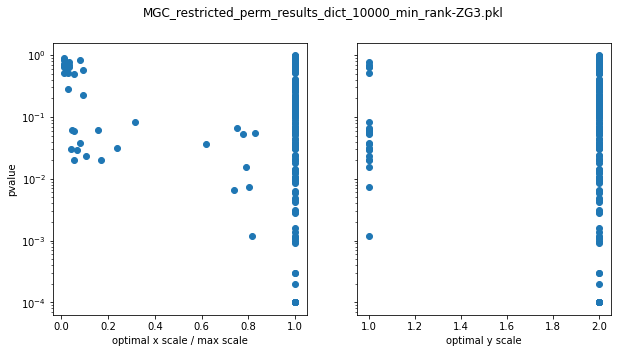

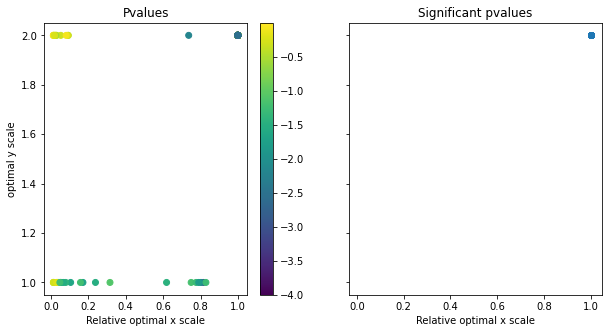

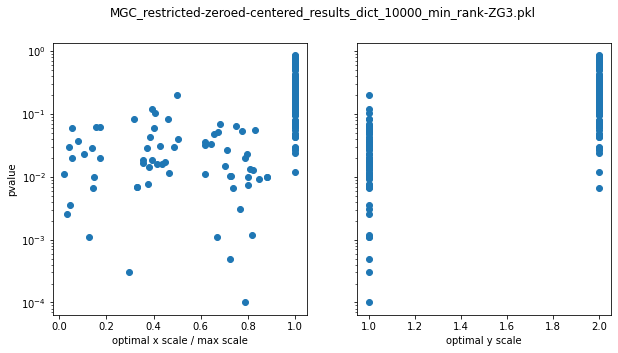

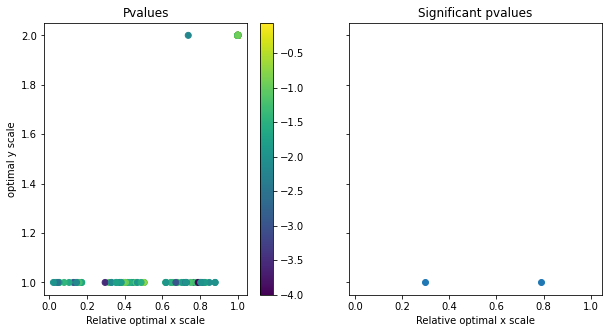

In [63]:
for i in range(2):
    with open(data_dir / file_names[i], 'rb') as handle:
        data_dict = pickle.load(handle)

    f, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
    pvals = []
    opt_xscales = []
    opt_yscales = []
    for key,val_dict in data_dict.items():
        for grad, mgc_dict in val_dict.items():
            pvals.append(mgc_dict['pvalue'])
            opt_xscales.append(mgc_dict['opt_scale'][0] / get_n_samples(key))
            opt_yscales.append(mgc_dict['opt_scale'][1])
    axes[0].scatter(opt_xscales, pvals)
    axes[0].set_ylabel('pvalue')
    axes[0].set_xlabel('optimal x scale / max scale')
    axes[0].set_yscale('log')
    axes[1].scatter(opt_yscales, pvals)
    axes[1].set_xlabel('optimal y scale')

    plt.suptitle(file_names[i])
    plt.show()
    
    
    fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True, sharex=True)
    scat1 = axes[0].scatter(opt_xscales, opt_yscales, c=np.log10(pvals))
    fig.colorbar(scat1, ax=axes[0])
    axes[0].set_title('Pvalues')
    axes[0].set_xlabel('Relative optimal x scale')
    axes[0].set_ylabel('optimal y scale')
    
    cutoff = 0.05 / 23 / 7
    idx = np.where(np.asarray(pvals) < cutoff)[0]
    axes[1].scatter(np.asarray(opt_xscales)[idx], np.asarray(opt_yscales)[idx])
    axes[1].set_title('Significant pvalues')
    axes[1].set_xlabel('Relative optimal x scale')
    plt.show()

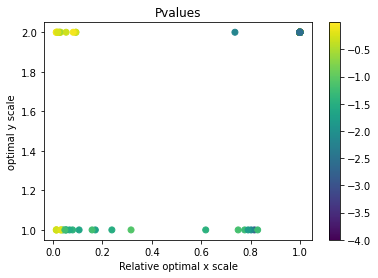

In [57]:
plt.scatter(opt_xscales, opt_yscales, c=np.log10(pvals))
plt.colorbar()
plt.title('Pvalues')
plt.xlabel('Relative optimal x scale')
plt.ylabel('optimal y scale')
plt.show()

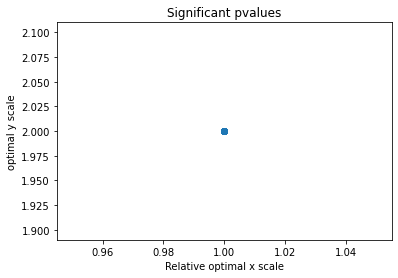

In [56]:
cutoff = 0.05 / 23 / 7
idx = np.where(np.asarray(pvals) < cutoff)[0]
plt.scatter(np.asarray(opt_xscales)[idx], np.asarray(opt_yscales)[idx])
plt.title('Significant pvalues')
plt.xlabel('Relative optimal x scale')
plt.ylabel('optimal y scale')
plt.show()